# Digit Recognizer

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
from keras.datasets import mnist

# for Multi-layer Perceptron (MLP) model
from keras.models import Sequential
from keras.layers import Dense

# for Convolutional Neural Network (CNN) model
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

# fix for issue: https://github.com/fchollet/keras/issues/2681
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


## Loading Data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Plotting images and their class values

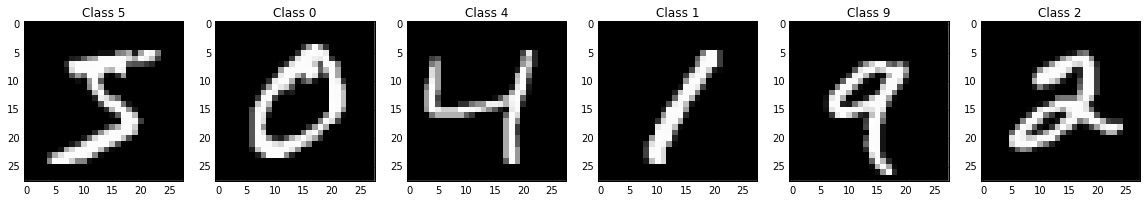

In [4]:
plt.figure(figsize=[20,8])
for i in range(6):
    plt.subplot(1,6,i+1)
    #plt.imshow(X_train[i])
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## Viewing shape and content of data

In [6]:
print (X_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


In [7]:
# print first train image values
# it contains a matrix of 28 rows and 28 cols
print (X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Flattening images

The neural-network takes a single vector for training. Therefore, we convert the 28x28 pixels images into a single 784 (28 * 28 = 784) dimensional vector.

In [8]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print (num_pixels, X_train.shape, X_test.shape)

(784, (60000, 784), (10000, 784))


In [9]:
print (X_train[1])

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.   51.  159.  253.  159.   50.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   48.  238.
  252.  252.  252.  237.    0.    0.    0.    0.   

## Normalizing input values

As we can see above, the pixel values for each image are gray scaled between 0 and 255. We now, normalize those values from 0-255 to 0-1.

In [10]:
# pixel values are gray scale between 0 and 255
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
print (X_train[1])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

## Converting target variable values into one-hot format

The output/target variable is in the format 0 to 9. As this is a multi-class classification problem, we convert the output class values into one-hot format which is simply a binary matrix, i.e.

>value 0 will be converted to one-hot format as [1, 0, 0, 0, 0, 0, 0, 0, 0]
>
>value 1 will be converted to one-hot format as [0, 1, 0, 0, 0, 0, 0, 0, 0]
>
>value 2 will be converted to one-hot format as [0, 0, 1, 0, 0, 0, 0, 0, 0]
>
>and so on...


In [11]:
print (y_train.shape)
print (y_train[0])

(60000,)
5


In [12]:
# one hot encode outputs
# note that we have new variables with capital Y
# Y_train is different than y_train
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

In [13]:
print (y_train.shape, Y_train.shape)
print (y_train[0], Y_train[0])

((60000,), (60000, 10))
(5, array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]))


## Define Simple Perceptron Model

Generally, neural networks have the following properties:
- an input layer as a single vector
- zero or multiple hidden layers after input layer
- an output layer after hidden layers which represents class scores in classification problem
- each neuron in a hidden layer is fully connected to all neurons in the previous layer
- neurons in a single layer function independently and do not have any connection with other neurons of the same layer

A **single-layer perceptron model** is the simplest kind of neural network where there are only two layers: ***input layer*** and ***output layer***. The inputs are directly fed into the outputs via a series of weights. It's a **[feed-forward network](https://en.wikipedia.org/wiki/Feedforward_neural_network)** where the information moves in only one direction, i.e. forward direction from input nodes to output nodes.

A **multi-layer perceptron model** is the other kind of neural network where there are one or more hidden layers in between input and output layers. The information flows from input layer to hidden layers and then to output layers. These models can be of **feed-forward** type or they can also use **[back-propagation](https://en.wikipedia.org/wiki/Backpropagation)** method. In back-propagation, the error is calculated in the output layer by computing the difference of actual output and predicted output. The error is then distributed back to the network layers. Based on this error, the algorithm will adjust the weights of each connection in order to reduce the error value. This type of learning is also referred as **deep learning**.

We create a **simple neural network** model with **one hidden layer** with 784 neurons. Our input layer will also have 784 neurons as we have flattened out training dataset into a single 784 dimensional vector.

*softmax* activation is used in the output layer.

*adam* gradient descent optimizer is used to learn weights.

In [14]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Fit and Evaluate Model

The model is fit over 5 epochs/iteration. It takes a batch of 200 images in each iteration. Test data is used as validation set. The epochs may be increased to improve accuracy.

Finally, test data is used to evaluate the model by calculating the model's classification accuracy.

In [15]:
model = baseline_model()
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 40s - loss: 0.2781 - acc: 0.9210 - val_loss: 0.1409 - val_acc: 0.9573
Epoch 2/5
60000/60000 [==============================] - 38s - loss: 0.1115 - acc: 0.9678 - val_loss: 0.0921 - val_acc: 0.9708
Epoch 3/5
60000/60000 [==============================] - 46s - loss: 0.0721 - acc: 0.9797 - val_loss: 0.0785 - val_acc: 0.9767
Epoch 4/5
60000/60000 [==============================] - 38s - loss: 0.0505 - acc: 0.9856 - val_loss: 0.0755 - val_acc: 0.9765
Epoch 5/5
60000/60000 [==============================] - 33s - loss: 0.0375 - acc: 0.9894 - val_loss: 0.0687 - val_acc: 0.9783


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [17]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print (scores)
print ('Score: {}'.format(scores[0]))
print ('Accuracy: {}'.format(scores[1]))

[0.068739435056527146, 0.97829999999999995]
Score: 0.0687394350565
Accuracy: 0.9783


## Plot correctly and incorrectly predicted images

Let's plot some images which are correctly predicted and some images which are incorrectly predicted on our test dataset.

In [18]:
# get predicted values
predicted_classes = model.predict_classes(X_test)

10000/10000 [==============================] - 3s     


In [19]:
# get index list of all correctly predicted values
correct_indices = np.nonzero(np.equal(predicted_classes, y_test))[0]

# get index list of all incorrectly predicted values
incorrect_indices = np.nonzero(np.not_equal(predicted_classes, y_test))[0]

In [20]:
print ('Correctly predicted: %i' % np.size(correct_indices))
print ('Incorrectly predicted: %i' % np.size(incorrect_indices))

Correctly predicted: 9783
Incorrectly predicted: 217


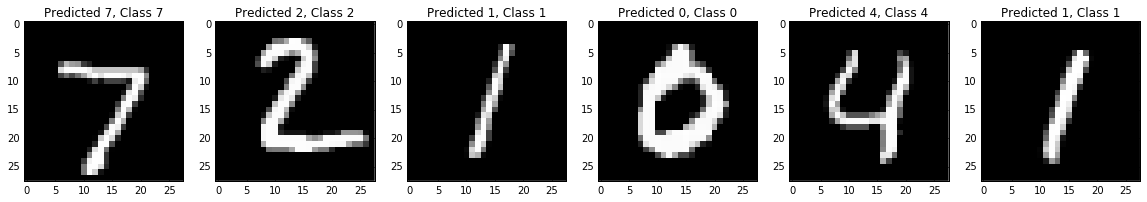

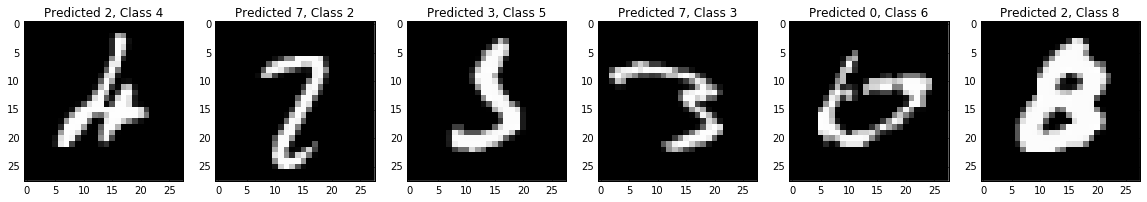

In [21]:
plt.figure(figsize=[20,8])
for i, correct in enumerate(correct_indices[:6]):
    plt.subplot(1,6,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure(figsize=[20,8])
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(1,6,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

## Confusion Matrix

Confusion Matrix in Numbers
[[ 970    0    1    1    2    1    2    1    2    0]
 [   0 1127    1    1    0    0    2    0    4    0]
 [   6    3  999    6    1    0    2    6    9    0]
 [   0    0    0 1004    0    0    0    4    2    0]
 [   1    1    2    1  968    0    3    1    1    4]
 [   2    1    0   21    1  857    5    0    4    1]
 [   4    2    0    1    3    5  943    0    0    0]
 [   0    7    7    4    1    0    0 1003    1    5]
 [   2    0    3   17    5    2    4    3  937    1]
 [   3    4    0    7   12    0    0    6    2  975]]

Confusion Matrix in Percentage
[[  9.90e-01   0.00e+00   1.02e-03   1.02e-03   2.04e-03   1.02e-03
    2.04e-03   1.02e-03   2.04e-03   0.00e+00]
 [  0.00e+00   9.93e-01   8.81e-04   8.81e-04   0.00e+00   0.00e+00
    1.76e-03   0.00e+00   3.52e-03   0.00e+00]
 [  5.81e-03   2.91e-03   9.68e-01   5.81e-03   9.69e-04   0.00e+00
    1.94e-03   5.81e-03   8.72e-03   0.00e+00]
 [  0.00e+00   0.00e+00   0.00e+00   9.94e-01   0.00e+00   0.00e

"\nplt.subplot(122)\nax = sns.heatmap(df_cnf_matrix_percent, annot=True)\nax.set_ylabel('True values')\nax.set_xlabel('Predicted values')\n"

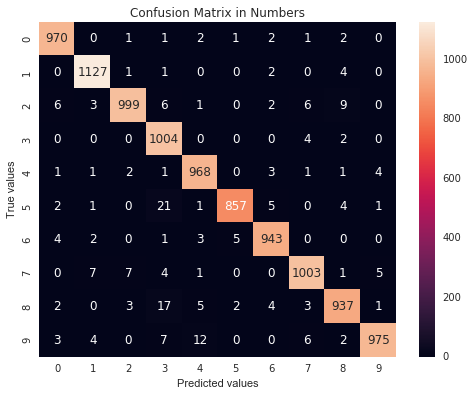

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set() # setting seaborn default for plots

class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_classes)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = class_names
predicted_class_names = class_names

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (8,6))

#plt.subplot(121)
ax = sns.heatmap(df_cnf_matrix, annot=True, fmt='d')
ax.set_ylabel('True values')
ax.set_xlabel('Predicted values')
ax.set_title('Confusion Matrix in Numbers')

'''
plt.subplot(122)
ax = sns.heatmap(df_cnf_matrix_percent, annot=True)
ax.set_ylabel('True values')
ax.set_xlabel('Predicted values')
'''

The above confusion matrix heatmap shows that:
- Most of value 5 was predicted as 3. 21 images of digit 5 were predicted as 3. 
- The second most incorrect prediction was of number 8. 17 images of digit 8 were predicted as 3. 
- The third highest wrong prediction was of number 9. 12 images of digit 9 were predicted as 4.

## Improve Accuracy using Convolution Neural Network (CNN) Model

[Convolutional Neural Networks (CNN)](https://en.wikipedia.org/wiki/Convolutional_neural_network) are similar to Multi-layer Perceptron Neural Networks. They are also made up of neurons that have learnable weights and biases. CNNs have been successfully applied to analyzing visual imagery. They are mostly being applied in image and video recognition, recommender systems and natural language processing.

A CNN consists of multiple hidden layers. The hidden layers are either *convolutional*, *pooling* or *fully connected*.

**Convolution layer:** Feature extraction is done in this layer. This layer applies convolution operation to the input and pass the result to the next layer. In the image classification problem, a weight matrix is defined in the convolution layer. A dot product is computed between the weight matrix and a small part (as the size of the weight matrix) of the input image. The weight runs across the image such that all the pixels are covered at least once, to give a convolved output.

> The weight matrix behaves like a **filter** in an image extracting particular information from the original image matrix. 
>
>A weight combination might be extracting edges, while another one might a particular color, while another one might just blur the unwanted noise.
>
>The weights are learnt such that the loss function is minimized similar to a Multi-layer Perceptron. 
>
>Therefore weights are learnt to extract features from the original image which help the network in correct prediction. 
>
>When we have multiple convolutional layers, the initial layer extract more generic features, while as the network gets deeper, the features extracted by the weight matrices are more and more complex and more suited to the problem at hand.
>
>*Reference: [Architecture of Convolutional Neural Networks (CNNs) demystified](https://www.analyticsvidhya.com/blog/2017/06/architecture-of-convolutional-neural-networks-simplified-demystified/)*

***Stride:*** While computing the dot product, if the weight matrix moves 1 pixel at a time then we call it a stride of 1. Size of the image keeps on reducing as we increase the stride value.

***Padding:*** Padding one or more layer of zeros across the image helps to resolve the output image size reduction issue caused by *stride*. Initial size of the image is retained after the padding is done.

**Pooling layer:** Reduction in number of feature parameters is done in this layer. When the image size is too larger, then we need a pooling layer in-between two convolution layers. This layer helps to reduce the number of trainable parameters of the input image. The sole purpose of pooling is to reduce the spatial size of the image. This layer is also used to control overfitting. 
- Max pooling: Uses maximum value from each of the cluster of the prior layer
- Average pooling: Uses the average value from each of the cluster of the prior layer

**Fully connected layer:** This layer comes after convolution and pooling layers. This layer connects each neuron in one layer to every neuron in another layer. This is similar to the concept of layer connection of Multi-layer perceptron model. Error is computed in the output layer by computing the difference in actual output and predicted output. After that, back-propagation is used to update the weight and biases for error and loss reduction.

## Load data

In [24]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Reshaping images

The image dimension expected by Keras for 2D (two-dimensional) convolution is in the format of **[pixels][width][height]**.

For RGB color image, the first dimension (pixel) value would be 3 for the red, green and blue components. It's like having 3 image inputs for every single color image. In our case (for MNIST handwritten images), we have gray scale images. Hence, the pixel dimension is set as 1.

In [25]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

print (num_pixels, X_train.shape, X_test.shape)

(784, (60000, 1, 28, 28), (10000, 1, 28, 28))


In [26]:
print (X_train[1])

[[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
      0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
      0.    0.    0.    0.]
  [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
      0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
      0.    0.    0.    0.]
  [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
      0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
      0.    0.    0.    0.]
  [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
      0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
      0.    0.    0.    0.]
  [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
      0.    0.    0.   51.  159.  253.  159.   50.    0.    0.    0.    0.
      0.    0.    0.    0.]
  [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
      0.    0.   48.  238.  252.  2

## Normalizing input values

As we can see above, the pixel values for each image are gray scaled between 0 and 255. We now, normalize those values from 0-255 to 0-1.

In [27]:
# pixel values are gray scale between 0 and 255
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
print (X_train[1])

[[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.2   0.62  0.99  0.62  0.2   0.    0.    0.    0.
    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.19  0.93  0.99  0.99  0.99  0.93  0.   

## Converting target variable values into one-hot format

The output/target variable is in the format 0 to 9. As this is a multi-class classification problem, we convert the output class values into one-hot format which is simply a binary matrix, i.e.

>value 0 will be converted to one-hot format as [1, 0, 0, 0, 0, 0, 0, 0, 0]
>
>value 1 will be converted to one-hot format as [0, 1, 0, 0, 0, 0, 0, 0, 0]
>
>value 2 will be converted to one-hot format as [0, 0, 1, 0, 0, 0, 0, 0, 0]
>
>and so on...


In [28]:
print (y_train.shape)
print (y_train[0])

(60000,)
5


In [29]:
# one hot encode outputs
# note that we have new variables with capital Y
# Y_train is different than y_train
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

In [30]:
print (y_train.shape, Y_train.shape)
print (y_train[0], Y_train[0])

((60000,), (60000, 10))
(5, array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]))


## Define Convolutional Neural Network (CNN) Model

**Convolution Layer**
- We define 32 feature maps with the size of 5x5 matrix
- We use ReLU (Rectified Linear Units) as the activation function
- This layer expects input image size of 1x28x28 ([pixels][height][weight])

**Max Pooling Layer**
- It has a pool size of 2x2

**Dropout Layer**
- Configured to randomly exclude 20% of neurons in the layer to reduce overfitting

**Flatten**
- Flattens the image into a single dimensional vector which is required as input by the fully connected layer

**Fully connected Layer**
- Contains 128 neurons
- relu is used as an activation function
- Output layer has num_classes=10 neurons for the 10 classes
- softmax activation function is used in the output layer
- adam gradient descent algorithm is used as optimizer to learn and update weights

In [33]:
# baseline model for CNN
def baseline_model():
    # create model    
    model = Sequential()    
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))    
    model.add(Dropout(0.2))
    model.add(Flatten())    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Fit and Evaluate Model

The model is fit over 5 epochs/iteration. It takes a batch of 200 images in each iteration. Test data is used as validation set. The epochs may be increased to improve accuracy.

Finally, test data is used to evaluate the model by calculating the model's classification accuracy.

In [35]:
model = baseline_model()
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 565s - loss: 0.2387 - acc: 0.9320 - val_loss: 0.0852 - val_acc: 0.9757
Epoch 2/5
60000/60000 [==============================] - 542s - loss: 0.0711 - acc: 0.9790 - val_loss: 0.0494 - val_acc: 0.9835
Epoch 3/5
60000/60000 [==============================] - 542s - loss: 0.0527 - acc: 0.9836 - val_loss: 0.0398 - val_acc: 0.9862
Epoch 4/5
60000/60000 [==============================] - 541s - loss: 0.0406 - acc: 0.9874 - val_loss: 0.0358 - val_acc: 0.9877
Epoch 5/5
60000/60000 [==============================] - 539s - loss: 0.0331 - acc: 0.9897 - val_loss: 0.0372 - val_acc: 0.9875


In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


In [36]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print (scores)
print ('Score: {}'.format(scores[0]))
print ('Accuracy: {}'.format(scores[1]))

[0.037228687924286352, 0.98750000000000004]
Score: 0.0372286879243
Accuracy: 0.9875


Accuracy (98.75%) of Convolution Neural Network (CNN) model has improved as compared to the accuracy (97.91%) of Multi-layer Perceptron (MLP) model. 

The accuracy of CNN model can be further increased by:
- increasing the epoch number while fitting the model
- adding more convolution and pooling layers to the model

## Plot correctly and incorrectly predicted images

Let's plot some images which are correctly predicted and some images which are incorrectly predicted on our test dataset.

In [37]:
# get predicted values
predicted_classes = model.predict_classes(X_test)

10000/10000 [==============================] - 59s    


In [39]:
# get index list of all correctly predicted values
correct_indices = np.nonzero(np.equal(predicted_classes, y_test))[0]

# get index list of all incorrectly predicted values
incorrect_indices = np.nonzero(np.not_equal(predicted_classes, y_test))[0]

In [40]:
print ('Correctly predicted: %i' % np.size(correct_indices))
print ('Incorrectly predicted: %i' % np.size(incorrect_indices))

Correctly predicted: 9875
Incorrectly predicted: 125


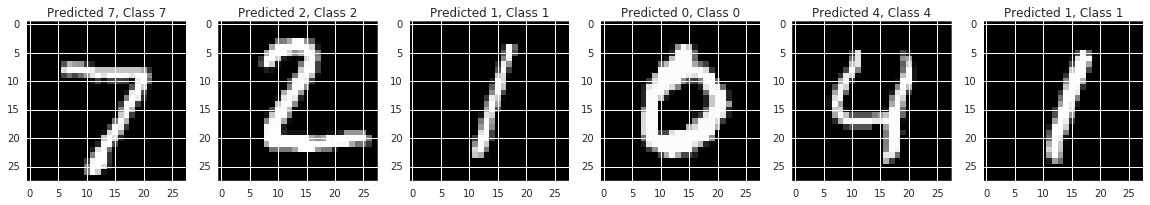

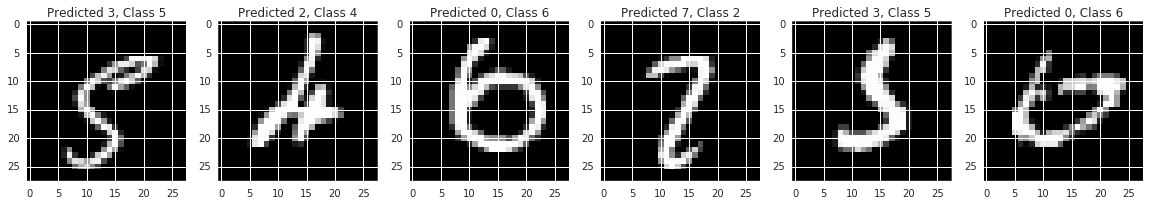

In [41]:
plt.figure(figsize=[20,8])
for i, correct in enumerate(correct_indices[:6]):
    plt.subplot(1,6,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure(figsize=[20,8])
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(1,6,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

## Confusion Matrix

Confusion Matrix in Numbers
[[ 973    0    2    1    0    1    1    0    2    0]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   0    3 1019    4    0    0    0    6    0    0]
 [   0    0    0 1009    0    0    0    0    1    0]
 [   0    0    2    0  976    0    0    0    0    4]
 [   2    0    0   12    0  875    2    0    0    1]
 [   6    2    0    1    1    4  942    0    2    0]
 [   1    2    5    2    0    0    0 1014    1    3]
 [   4    0    4    9    2    0    1    3  946    5]
 [   0    2    0    9    4    2    0    3    2  987]]

Confusion Matrix in Percentage
[[  9.93e-01   0.00e+00   2.04e-03   1.02e-03   0.00e+00   1.02e-03
    1.02e-03   0.00e+00   2.04e-03   0.00e+00]
 [  0.00e+00   9.99e-01   0.00e+00   0.00e+00   0.00e+00   0.00e+00
    8.81e-04   0.00e+00   0.00e+00   0.00e+00]
 [  0.00e+00   2.91e-03   9.87e-01   3.88e-03   0.00e+00   0.00e+00
    0.00e+00   5.81e-03   0.00e+00   0.00e+00]
 [  0.00e+00   0.00e+00   0.00e+00   9.99e-01   0.00e+00   0.00e

"\nplt.subplot(122)\nax = sns.heatmap(df_cnf_matrix_percent, annot=True)\nax.set_ylabel('True values')\nax.set_xlabel('Predicted values')\n"

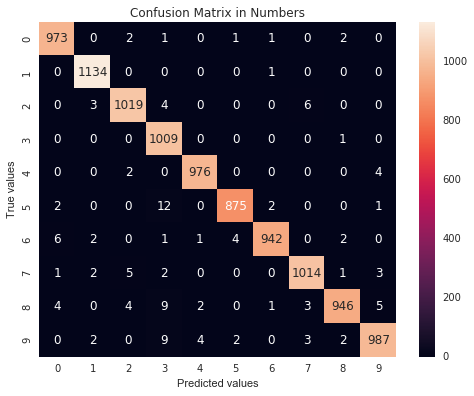

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set() # setting seaborn default for plots

class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_classes)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = class_names
predicted_class_names = class_names

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (8,6))

#plt.subplot(121)
ax = sns.heatmap(df_cnf_matrix, annot=True, fmt='d')
ax.set_ylabel('True values')
ax.set_xlabel('Predicted values')
ax.set_title('Confusion Matrix in Numbers')

'''
plt.subplot(122)
ax = sns.heatmap(df_cnf_matrix_percent, annot=True)
ax.set_ylabel('True values')
ax.set_xlabel('Predicted values')
'''

Using Multi-layer Perceptron (MLP) Model, we had the following heatmap outcome:
- Most of value 5 was predicted as 3. 21 images of digit 5 were predicted as 3. 
- The second most incorrect prediction was of number 8. 17 images of digit 8 were predicted as 3. 
- The third highest wrong prediction was of number 9. 12 images of digit 9 were predicted as 4.

Using Convolutional Neural Network (CNN) Model, we had the following improvements:
- Number 5 predicted as 3 has been reduced from 21 to 12.
- Number 8 predicted as 3 has been reduced from 17 to 9.
- Number 9 predicted as 3 has been reduced from 12 to 9.

The accuracy of CNN model can be further increased by:
- increasing the epoch number while fitting the model
- adding more convolution and pooling layers to the model

## Submission to Kaggle

In [ ]:
submissions = pd.DataFrame({'ImageId':list(range(1,len(predicted_classes) + 1)), "Label": predicted_classes})
#submissions.to_csv("submission.csv", index=False, header=True)

## References

- [Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)
- [Building a simple neural-network with Keras](https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb)

- [Architecture of Convolutional Neural Networks (CNNs) demystified](https://www.analyticsvidhya.com/blog/2017/06/architecture-of-convolutional-neural-networks-simplified-demystified/)